In [4]:
# !pip install nltk==3.7
# !pip install numpy==1.21.5
# !pip install pandas==1.3.5
# !pip install scikit_learn==1.0.2
# !pip install tensorflow==2.7.0
# !pip install torch==1.10.2
# !pip install matplotlib==3.4.3

In [5]:
# Importing Necessary libraries
import re
import nltk
import time
import torch
import string
import numpy as np
import pandas as pd
import torch.nn as nn
# import tensorflow as tf

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hemje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# from tensorflow import keras
from nltk import PorterStemmer
import torch.nn.functional as F
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.model_selection import train_test_split


---

# Reading the Data 

In [7]:
# Reading data
data = pd.read_csv('../Input/review_data (1).csv')
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaN
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28


# Information About Dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1500 non-null   object
 1   userName              1500 non-null   object
 2   userImage             1500 non-null   object
 3   content               1500 non-null   object
 4   score                 1500 non-null   int64 
 5   thumbsUpCount         1500 non-null   int64 
 6   reviewCreatedVersion  1500 non-null   object
 7   at                    1500 non-null   object
 8   replyContent          523 non-null    object
 9   repliedAt             523 non-null    object
dtypes: int64(2), object(8)
memory usage: 117.3+ KB


In [ ]:
pd.set_option('display.max_colwidth', -1)

In [10]:
# Selecting the needed Column

data = data[['content','score']]
data

,content,score
0,Overall it's really an amazing app. I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years? The texts were blurred and when you zoom it out it's pixelated. I thought this issue only occurs on mobile apps however it was also present on the website. Please fix this. I still remember the time when I can export high definition texts and I love that experience. Thank you!,4
1,Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤,5
2,"Canva used to be a good app! But recently I've been facing issues in saving my files. When I want my files to be saved in '.png' format, it gets saved in .jpg format! Moreover when I want my files to be saved it gets stuck at the downloading screen (where your so called magic does not happen) For now you'll be getting 1 stars from me. I hope you will fix the app soon! Thank you .",1
3,"It's a brilliant app, but I have just one problem, if I'm editing a post and I double tap the photo to reposition, if I then start to zoom the photo, 8 times out of 10 my app crashes and restarts, this is on my LG G5 SE, sometimes I've had to go over to the desktop version on my PC just to reposition and zoom the photo where I want it to then resume editing back on my mobile.",5
4,"This was such a great app. I used to make BTS memes through this. But after recent update... I'm not able to change my font style. The edit option of font is missing. I tried uninstalling and installing the app, but still it's isn't working. The edit option for font is appearing very rarely. The previous version was far better. Canva could you please work on it! 💜",4
...,...,...
1495,Absolutely amazing and a lifesaver for teachers.,5
1496,Very nice but many a times shows error opening the ppt. This was my school project and now has disturbed me.,3
1497,Too much lag. Always stuck on starting page. Worst app. Don't download,1
1498,Nice app for all college work. So many features and templates to work with. Loved it❤️,5


---

# Function to Clean the Text

In [11]:
def clean_text(txt):
    """
    Clean and preprocess text data.
    :param txt: Input text to be cleaned
    :return: Cleaned text
    """
    # Convert text to lowercase
    txt = txt.lower()

    # Remove all special characters, including apostrophes
    txt = re.sub(r'\W', ' ', str(txt))

    # Remove punctuations
    txt = txt.translate(str.maketrans('', '', string.punctuation))

    # Remove digits
    txt = ''.join([i for i in txt if not i.isdigit()]).strip()

    # Remove single characters (e.g., "it's" -> "it s" then remove "s")
    txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt)

    # Substitute multiple spaces with a single space
    txt = re.sub(r'\s+', ' ', txt, flags=re.I)

    # Remove links (e.g., "http://example.com" -> "")
    txt = re.sub(r"(http\S+|http)", "", txt)

    # Tokenize the text, stem words, and remove English stopwords
    txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stopwords.words('english')])

    return txt


---

# Comparison Between Orginal Text and Processed Text

In [12]:
print('Original Text : ',data['content'][1])  
print('Processed Text : ',clean_text(data['content'][1]))

Original Text :  Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤
Processed Text :  hey ye gave star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank


---

# Applying the Function to the Dataset

In [13]:
data['content'] = data['content'].apply(clean_text)  # Apply the 'clean_text' function to every text in the 'content' column

data

,content,score
0,overal realli amaz app use past year howev one issu though want get address sinc think issu last mani year text blur zoom pixel thought issu occur mobil app howev also present websit pleas fix still rememb time export high definit text love experi thank,4
1,hey ye gave star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank,5
2,canva use good app recent face issu save file want file save png format get save jpg format moreov want file save get stuck download screen call magic happen get star hope fix app soon thank,1
3,brilliant app one problem edit post doubl tap photo reposit start zoom photo time app crash restart lg se sometim go desktop version pc reposit zoom photo want resum edit back mobil,5
4,great app use make bt meme recent updat abl chang font style edit option font miss tri uninstal instal app still work edit option font appear rare previou version far better canva could pleas work,4
...,...,...
1495,absolut amaz lifesav teacher,5
1496,nice mani time show error open ppt school project disturb,3
1497,much lag alway stuck start page worst app download,1
1498,nice app colleg work mani featur templat work love,5


---

# Distribution of Classes in the dataset

In [14]:
data.score.value_counts() 

5    952
4    227
1    170
3    91 
2    60 
Name: score, dtype: int64

- we can see that class "5"  is dominating in the dataset. Thus we need to Balance the Dataset.

<AxesSubplot:>

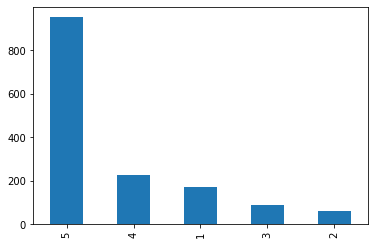

In [15]:
pd.value_counts(data['score']).plot.bar()

---

# Balancing the Dataset

In [16]:
# Divide the dataset into different classes based on the 'score' column
df_majority = data[data['score'] == 5]  # Data with class 5
df_minority1 = data[data['score'] == 2]  # Data with class 2
df_minority2 = data[data['score'] == 3]  # Data with class 3
df_minority3 = data[data['score'] == 1]  # Data with class 1
df_minority4 = data[data['score'] == 4]  # Data with class 4


# Upasampling the Monority class and Downsampling the Majority Class

In [17]:
# Down Sampling Majority Class "5"
df_majority_downsampled = resample(df_majority, replace=False, n_samples=600)

# Upsample Minority class "2"
df_minority_upsampled = resample(df_minority1, replace=True, n_samples=200)

# Upsample Minority class "3"
df_minority_upsampled1 = resample(df_minority2, replace=True, n_samples=300)

# Upsample Minority class "1"
df_minority_upsampled2 = resample(df_minority3, replace=True, n_samples=225)

# Upsample Minority class "4"
df_minority_upsampled3 = resample(df_minority4, replace=True, n_samples=250)

# Combine minority class with downsampled majority class to create a balanced dataset
data1 = pd.concat([df_majority_downsampled, df_minority_upsampled, df_minority_upsampled1, df_minority_upsampled2, df_minority_upsampled3])


In [18]:
data1.score.value_counts()

5    600
3    300
4    250
1    225
2    200
Name: score, dtype: int64

---

# Now we have a Balanced Dataset

<AxesSubplot:>

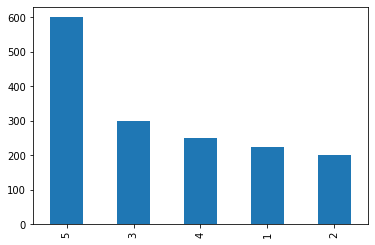

In [19]:
pd.value_counts(data1['score']).plot.bar()

---

# Defining the Parameters and Tokenizer

In [20]:
# !pip install tensorflow==2.0.0 --upgrade --force-reinstall

In [21]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum number of words to be used (most frequent)
MAX_NB_WORDS = 2000

# Define the maximum number of words in each content
MAX_SEQUENCE_LENGTH = 600

# Define the embedding dimension
EMBEDDING_DIM = 100

# Create a Keras Tokenizer with specified parameters
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Fit the tokenizer on the 'content' values of the 'data1' DataFrame
tokenizer.fit_on_texts(data1['content'].values)

# Build a word index based on the fitted tokenizer
word_index = tokenizer.word_index

# Print the number of unique tokens found
print('Found %s unique tokens.' % len(word_index))


Found 1353 unique tokens.


In [22]:
# Tokenize the 'content' values of the 'data1' DataFrame using the fitted tokenizer
X = tokenizer.texts_to_sequences(data1['content'].values)

# Pad the sequences to ensure they all have a consistent length
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Print the shape of the data tensor (X)
print('Shape of data tensor:', X.shape[1])


Shape of data tensor: 600


In [23]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the LabelEncoder on the 'score' column of the 'data1' DataFrame and transform it into numerical labels
Y = le.fit_transform(data1['score'])

# Print the shape of the transformed labels (Y)
print(Y.shape)

# Print the unique classes that were encoded
print(le.classes_)

# Print the data type of the encoded labels
Y.dtype


(1575,)
[1 2 3 4 5]


dtype('int64')

---

# Splitting Dataset to Train and Test Data

In [24]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42, stratify=Y)

# Print the shapes of the training and testing data and labels
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(1417, 600) (1417,)
(158, 600) (158,)


In [25]:
# Y_test = torch.Tensor(Y_test.to_numpy())
# Y_test.dtype

In [26]:
# Convert the training data into a PyTorch tensor
x_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(Y_train, dtype=torch.long)
x_cv = torch.tensor(X_test, dtype=torch.long)
y_cv = torch.tensor(Y_test, dtype=torch.long)


---

# Converting dataset to a Torch Datset

In [27]:
# Create a TensorDataset for the training and validation data and labels
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)


In [28]:
# Define the maximum number of features
max_features = 2000

# Define the batch size for training
batch_size = 50

# Set the vocab size to the maximum number of features
vocab_size = max_features

# Create a data loader for the training data
train_dl = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

# Create a data loader for the validation data
val_dl = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

---

# Defining the Model

In [29]:
class LSTM(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init()
        
        # Define the hidden dimension
        self.hidden_dim = hidden_dim
        
        # Define the embedding layer
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        # self.drop  = nn.Dropout(p=0.2)
        
        # Define the first LSTM layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        
        # Define the second LSTM layer
        self.lstm1 = nn.LSTM(hidden_dim, 64, batch_first=True)
        
        # Define the linear layer for classification
        self.linear = nn.Linear(64, 5)
        
        # Define the softmax layer
        # self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.embeddings(x)  # Pass input through the embedding layer
        out_pack, (ht, ct) = self.lstm(x)  # Pass through the first LSTM layer
        out_pack1, (ht, ct) = self.lstm1(out_pack)  # Pass through the second LSTM layer
        out = self.linear(ht[-1])  # Pass through the linear layer for classification
        # out = self.softmax(out)  # Softmax layer
        return out


---

# Structure of the Model

In [30]:
# Initialize the model with specified parameters
model = LSTM(vocab_size, 128, 64)

# Print the model architecture
print(model)


LSTM(
  (embeddings): Embedding(2000, 128, padding_idx=0)
  (lstm): LSTM(128, 64, batch_first=True)
  (lstm1): LSTM(64, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=5, bias=True)
)


---

# Model Tranining And Validation

In [32]:
# Define the number of training epochs
n_epochs = 10

# Define the loss function (Cross Entropy) and optimizer (Adam)
loss_fn = nn.CrossEntropyLoss()  # Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

# Lists to store training and validation loss
train_loss = []
valid_loss = []

# Loop over the specified number of epochs
for epoch in range(n_epochs):
    start_time = time.time()

    # Set the model in training mode
    model.train()  # Indicator for training
    avg_loss = 0.

    # Loop over the training data
    for i, (x_batch, y_batch) in enumerate(train_dl):
        # Predict/Forward Pass
        y_pred = model(x_batch)
      # x_batch = x_batch.cuda()
      # y_batch = y_batch.cuda()

        # Compute the loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_dl)

    # Set the model in validation mode
    model.eval()  # Indicator for Validation
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv), len(le.classes_))

    # Loop over the validation data
    for i, (x_batch, y_batch) in enumerate(val_dl):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(val_dl)

        # Keep/store predictions
        val_preds[i * batch_size:(i + 1) * batch_size] = F.softmax(y_pred).cpu().numpy()

        # Calculate validation accuracy
    val_accuracy = sum(val_preds.argmax(axis=1) == Y_test) / len(Y_test)

    # Append the training and validation loss
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)

    elapsed_time = time.time() - start_time
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
        epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

---

# Plotting the Loss

In [ ]:
# Function to plot the loss vs. epoch graph
def plot_graph(train_loss, valid_loss):
    epochs = len(train_loss) # Calculate the number of epochs
    plt.figure(figsize=(12, 6))
    plt.title("Train/Validation Loss") # Set the title of the graph
    plt.plot(range(1, epochs + 1), train_loss, label='Train Loss', marker='o') # Plot the training loss with markers and label
    plt.plot(range(1, epochs + 1), valid_loss, label='Validation Loss', marker='o') # Plot the validation loss with markers and label
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


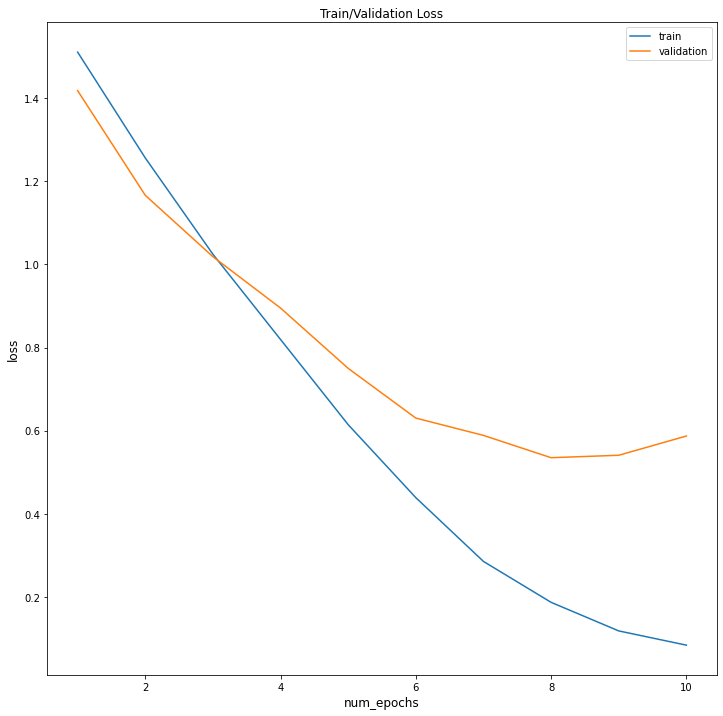

In [ ]:
plot_graph(n_epochs)

---